C:\Users\mvash\AppData\Local\Temp\ipykernel_21360\2732638813.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure(); ax = fig.gca(projection='3d')


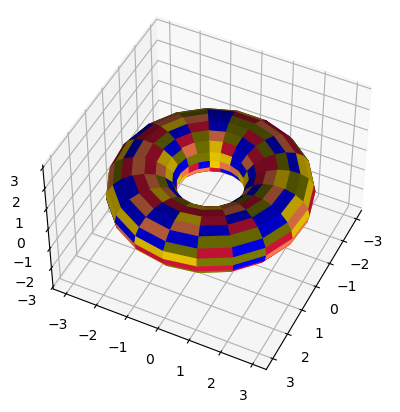

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(); ax = fig.gca(projection='3d')
angs = np.linspace(0, 2.*np.pi, 20)
theta, phi = np.meshgrid(angs, angs)
x = (2 + np.cos(theta)) * np.cos(phi)
y = (2 + np.cos(theta)) * np.sin(phi)
z = np.sin(theta)
rng = np.random.default_rng()
randind = rng.integers(5, size=x.shape)
colors = np.array(['crimson', 'coral', 'gold', 'blue', 'olive'])[randind]
ax.plot_surface(x, y, z, facecolors=colors, linewidth=1, edgecolors='k')
ax.view_init(46, 26); ax.set_zlim(-3,3);

For n = 3, we can model the process as a Markov chain where the states represent all possible color configurations on the arcs. The arcs can be red or blue, so there are 2^n possible configurations.

Number of states: 2^n = 2^3 = 8 states.
Directed graph of the Markov chain: We can draw the directed graph representing transitions between the states. Each state represents a color configuration, and transitions occur when one of the arcs changes its color.
Absorbing states: In this specific case, there may not be absorbing states as every state can transition to another state.
Absorbing Markov chain: It's not an absorbing Markov chain since there are no absorbing states.

In [2]:
import numpy as np

def hit_absorbing_probabilities(n):
    num_states = 2**n
    absorbing_states = 0  

    for state in range(num_states):
        colors = [int(x) for x in format(state, '0' + str(n) + 'b')]  
        if colors[0] == colors[-1]:
            absorbing_states += 1

    probabilities = absorbing_states / num_states
    return probabilities

n = 3
probabilities = hit_absorbing_probabilities(n)
print(f"Probability of hitting absorbing states for n = {n}: {probabilities:.4f}")



Probability of hitting absorbing states for n = 3: 0.5000


Extending this process to a torus is similar to a 2D grid, where each cell can have one of k colors. The transitions happen between neighboring cells. The process can still be modeled as a Markov chain, with each state representing a color configuration.

The number of states for a torus with n x n rectangles, each having k colors, is k^(n^2).

To compute probabilities for this more complex scenario, we would need to set up a larger transition matrix and calculate probabilities accordingly. The procedure is similar, but it involves more states and transitions based on the number of neighbors. The principles of absorbing states and absorbing Markov chains apply in a similar way.